In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Academic_Performance.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STUDENT_ID          12411 non-null  object 
 1   GENDER              12389 non-null  object 
 2   PLACEMENT           12396 non-null  object 
 3   HONOR_OPTED_OR_NOT  12397 non-null  object 
 4   EDUCATION_TYPE      12396 non-null  object 
 5   ACADEMIC_PROGRAM    12377 non-null  object 
 6   COURSE 1 MARKS      12400 non-null  float64
 7   COURSE 2 MARKS      12403 non-null  float64
 8   COURSE 3 MARKS      12397 non-null  float64
 9   COURSE 4 MARKS      12397 non-null  float64
 10  COURSE 5 MARKS      12389 non-null  float64
 11  PERCENTILE          12411 non-null  int64  
 12  OVEARLL_GRADE       12411 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 1.2+ MB


In [6]:
df.isnull().sum()

STUDENT_ID             0
GENDER                22
PLACEMENT             15
HONOR_OPTED_OR_NOT    14
EDUCATION_TYPE        15
ACADEMIC_PROGRAM      34
COURSE 1 MARKS        11
COURSE 2 MARKS         8
COURSE 3 MARKS        14
COURSE 4 MARKS        14
COURSE 5 MARKS        22
PERCENTILE             0
OVEARLL_GRADE          0
dtype: int64

In [12]:
for col in df.select_dtypes(include = ['number']).columns:
    df.loc[:,col]=df[col].fillna(df[col].mean())
for col in df.select_dtypes(include = ['object']).columns:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])

In [14]:
df.isnull().sum()

STUDENT_ID            0
GENDER                0
PLACEMENT             0
HONOR_OPTED_OR_NOT    0
EDUCATION_TYPE        0
ACADEMIC_PROGRAM      0
COURSE 1 MARKS        0
COURSE 2 MARKS        0
COURSE 3 MARKS        0
COURSE 4 MARKS        0
COURSE 5 MARKS        0
PERCENTILE            0
OVEARLL_GRADE         0
dtype: int64

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
def remobe_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    median = data[column].median()
    return data[(data[column] >=lower) & (data[column] <= upper)]

In [22]:
numeric_cols = df.select_dtypes(include = ['number']).columns

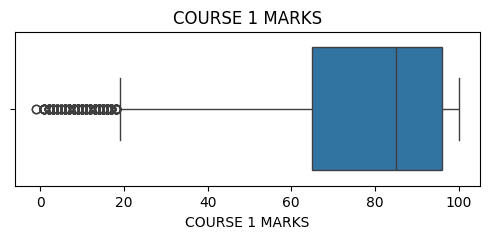

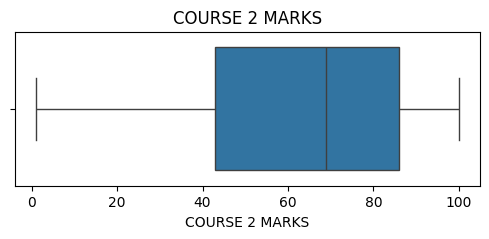

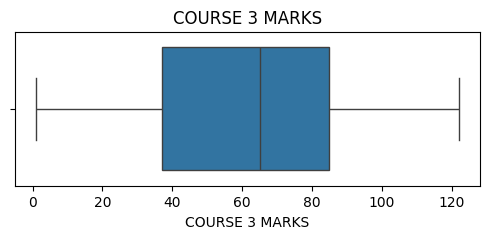

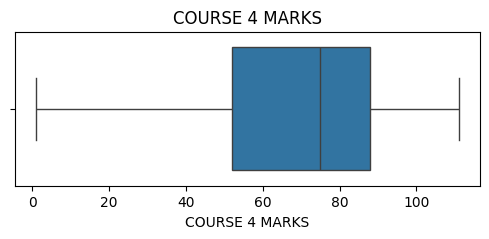

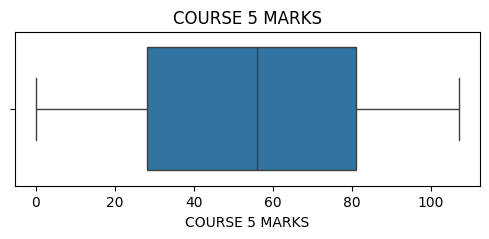

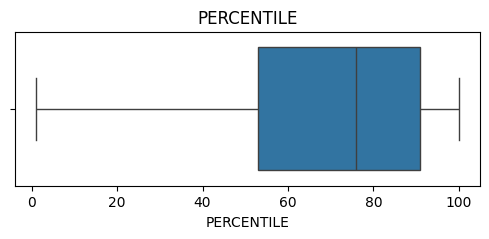

In [30]:
for col in numeric_cols:
    plt.figure(figsize = (6,2))
    sns.boxplot(x = df[col])
    plt.title(f"{col}")
    plt.show()
    df = remobe_outliers(df, col)

In [31]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()
for col in df.select_dtypes(include = ['object']):
    df[col]=le.fit_transform(df[col])
    

In [36]:
df.head()

,STUDENT_ID,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,OVEARLL_GRADE
0,0,0,1,1,0,13,71.0,93.0,71.0,93.0,79.0,91,1
1,1,0,1,1,0,13,97.0,38.0,86.0,98.0,78.0,92,3
3,2,0,1,1,0,13,65.0,35.0,76.0,80.0,48.0,67,1
4,3,1,1,1,0,13,94.0,94.0,98.0,100.0,71.0,98,1
5,4,0,1,1,0,13,86.0,15.0,32.0,97.0,36.0,63,1
